This file is the code infrastructure to follow along with the experiment from the paper.

In [1]:
from matplotlib.colors import ListedColormap
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
class BML:
    def __init__(self, n, m):
        """
        Sets up an empty grid for a biham-middleton-levine model.
        
        args:
            n: int length of grid
            m: int width of grid     
        """
        self.array = np.zeros((n, m), dtype=np.int8)
        self.n = n
        self.m = m
        self.cmap = ListedColormap(['white', '#95d0fc', '#ff474c'])
        self.t = 0
        self.no_change = []
        

    def start_small(self):
        """
        A preset starting config with 1 blue cell and 2 red cells.
        """
        self.array[0, self.m//2] = 1
        self.array[0, self.m//2 +1] = 2
        self.array[self.n//2, 0] = 2

    def start_density(self, density):
        """
        Randomly adds red and blue cells throughout a grid to a specific density.

        args:
            density: an int between 0 anf 1 to determine how full the grid is
        """
        self.array = np.random.choice([0,1,2], size=(self.n,self.m), p=[1-density, density/2, density/2])


    def step(self, color):
        """
        Move all blue cells one over to the right if the next cell is empty.

            args: 
                color: an int, 1 or 2, representing the color that is stepping
        """
        if color == 2:
            self.array = self.array.T
        movement = False
        for row in self.array:
            cell_0 = row[0]
            i = 0
            while i  < len(row):
                if i == len(row) - 1:
                    if row[i] == color and cell_0 == 0:
                        row[i] = 0
                        row[0] = color
                        movement = True
                    break
                else:
                    if row[i] == color and row[i+1] == 0:
                        row[i] = 0
                        row[i+1] = color
                        i += 2
                        movement = True
                    else:
                      i+=1
        if movement == False:
            self.no_change.append(self.t)
        if color == 2:
            self.array = self.array.T

    def loop(self, steps=1):
        """
        Create complete cycles of blue and then red cell moving.

        args:
            steps: an int of the number of cycles
        """
        for _ in range(steps):
            self.step(1)
            self.step(2) 
            self.t += 1
            

    def animate(self, frames=1, interval=None):
        """
        Animates the cycles.

        args:
            frames: an int of the number of frames
            interval: an int of the time to put between frames
        """
        plt.figure()
        try:
            for _ in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                self.loop()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

    def draw(self, start=0, end=None):
      """
      Draw the current grid.

      args:
        start: an int index to represent where to start displaying
        end: an int index to represent where to stop displaying
      """
      a = self.array[:, start:end]
      plt.imshow(a, cmap=self.cmap, alpha=0.7)

      # turn off axis tick marks
      plt.xticks([])
      plt.yticks([])


In [6]:
def measure(density, loops, depth):
    no_times = []
    speed_counter = 0
    for _ in range(loops):
        bml = BML(100, 100)
        bml.start_density(density)
        bml.loop(depth)
        i = 0
        found = False
        while i+1<len(bml.no_change):
            if bml.no_change[i] == bml.no_change[i+1]:
                print(bml.no_change[i], "this is it")
                no_times.append(bml.no_change[i])
                found = True
                break
            i += 1
        if not found:
            print("speed one")
            speed_counter += 1
            
    print(no_times)
    print("Speed counter:", speed_counter)
    if len(no_times):
        avg = sum(no_times) / len(no_times)
    else:
        avg = 0
    return avg, speed_counter

measure(.9, 5, 100)

26 this is it
26 this is it
23 this is it
44 this is it
47 this is it
[26, 26, 23, 44, 47]
Speed counter: 0


(33.2, 0)

In [7]:
# size 100
density = increment_list = [i / 100 for i in range(0, 101)]
stop = []

for i in range(len(density)):
    avg, speed_counter = measure(density[i], 5, 900)
    stop.append(avg)

print(stop)

0 this is it
0 this is it
0 this is it
0 this is it
0 this is it
[0, 0, 0, 0, 0]
Speed counter: 0
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed counter: 5
speed one
speed one
speed one
speed one
speed one
[]
Speed cou

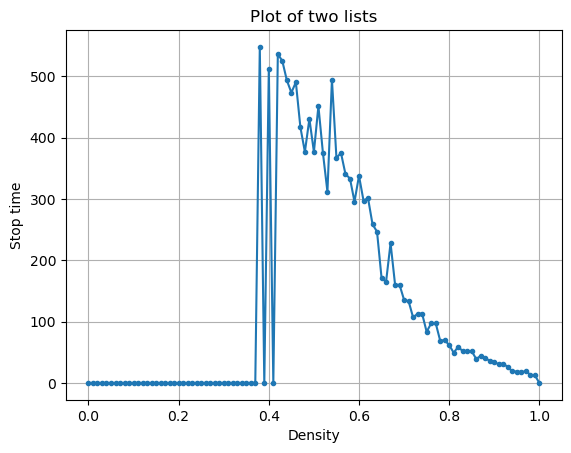

In [12]:
den_10 = [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548.0, 0, 512.0, 0, 536.5, 525.0, 493.5, 473.5, 490.4, 417.2, 376.8, 430.75, 376.75, 451.5, 375.2, 311.8, 494.4, 366.8, 375.2, 340.6, 333.4, 295.6, 337.8, 297.4, 301.4, 258.8, 246.6, 171.4, 164.6, 228.0, 160.4, 159.8, 135.4, 133.4, 106.8, 112.8, 113.0, 83.4, 97.0, 97.8, 69.0, 69.8, 61.8, 49.2, 59.0, 51.8, 52.0, 51.8, 39.0, 44.2, 41.4, 35.4, 34.4, 30.2, 31.6, 25.8, 19.0, 18.6, 17.6, 19.2, 13.4, 12.4, 0.0]

# Plotting the lists
plt.plot(density, den_10, marker='.')

# Adding labels and title
plt.xlabel('Density')
plt.ylabel('Stop time')
plt.title('Plot of two lists')

# Display the plot
plt.grid(True)
plt.show()

